In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string

In [2]:
data = pd.read_csv('spam.csv', encoding='latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
data.shape

(5572, 5)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
data['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

In [6]:
data['Unnamed: 2'].value_counts()

 bt not his girlfrnd... G o o d n i g h t . . .@"                                                                                                   3
 PO Box 5249                                                                                                                                        2
this wont even start........ Datz confidence.."                                                                                                     2
GN                                                                                                                                                  2
 don't miss ur best life for anything... Gud nyt..."                                                                                                2
 but dont try to prove it..\" .Gud noon...."                                                                                                        2
 Gud night...."                                                                                     

## Data Cleaning

In [7]:
# drop last 3 columns
data.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'] , inplace = True)

In [8]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
data.rename(columns = {'v1' : 'Label' , 'v2' : 'sms'} , inplace = True)

In [10]:
data.head()

,Label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
# Label encoding
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
data['Label'] = encode.fit_transform(data['Label'])

In [12]:
data.isnull().sum()

Label    0
sms      0
dtype: int64

In [13]:
data.duplicated().sum()

403

In [14]:
# remove duplicates
data = data.drop_duplicates(keep = 'first')

In [15]:
data.duplicated().sum()

0

In [16]:
data.shape

(5169, 2)

## EDA

In [17]:
data['Label'].value_counts()  # imbalanced data

0    4516
1     653
Name: Label, dtype: int64

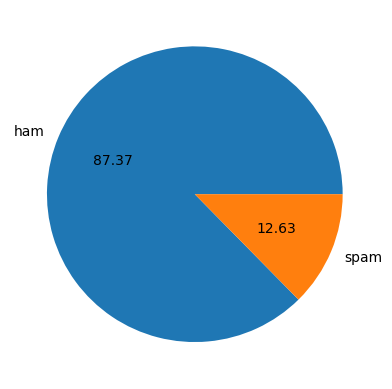

In [18]:
# check with the help of pie
plt.pie(data['Label'].value_counts() , labels = ['ham','spam'] , autopct = '%0.2f')
plt.show()

In [19]:
import nltk

In [20]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Ruchi
[nltk_data]     Kumari\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
data['No._of_char'] = data['sms'].apply(len)

In [22]:
data['No._of_words'] = data['sms'].apply(lambda x : len(nltk.word_tokenize(x)))

In [23]:
data.head()

,Label,sms,No._of_char,No._of_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [24]:
data['No._of_sentences'] = data['sms'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [25]:
data.head()

,Label,sms,No._of_char,No._of_words,No._of_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [26]:
# statistical description of ham sms
data[data['Label'] == 0][['No._of_char','No._of_words','No._of_sentences']].describe()

,No._of_char,No._of_words,No._of_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [27]:
# statistical description of spam sms
data[data['Label'] == 1][['No._of_char','No._of_words','No._of_sentences']].describe()

,No._of_char,No._of_words,No._of_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


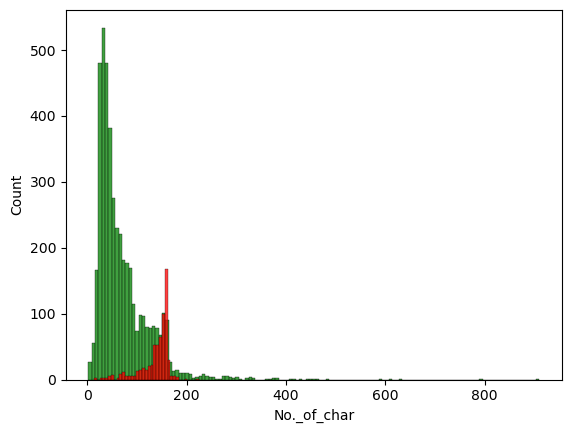

In [28]:
sns.histplot(data[data['Label'] == 0]['No._of_char'] , color = 'green') # ham
sns.histplot(data[data['Label'] == 1]['No._of_char'] , color = 'red') # spam
plt.show()
# most of the spam messages are made from more number of characters in comparision with ham messages

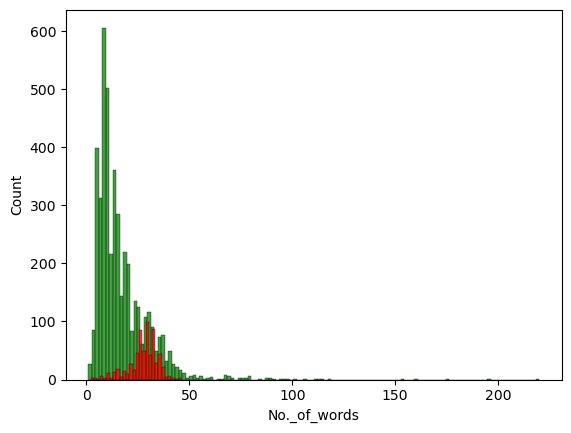

In [29]:
sns.histplot(data[data['Label'] == 0]['No._of_words'] , color = 'green') # ham
sns.histplot(data[data['Label'] == 1]['No._of_words'] , color = 'red') # spam
plt.show()
# most of the spam messages are made from more no. of words

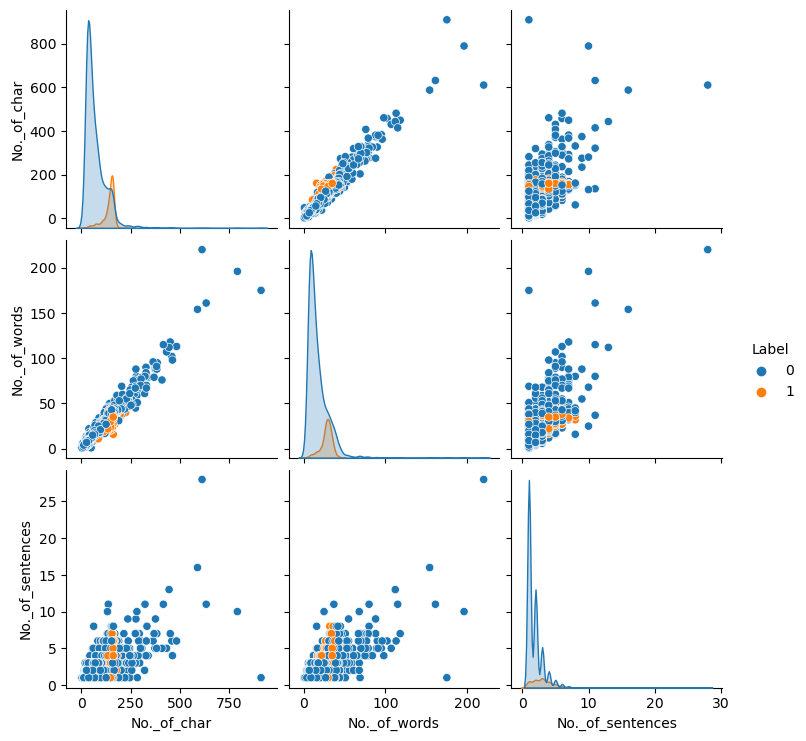

In [30]:
sns.pairplot(data , hue= 'Label')
# data has few outliers

<AxesSubplot:>

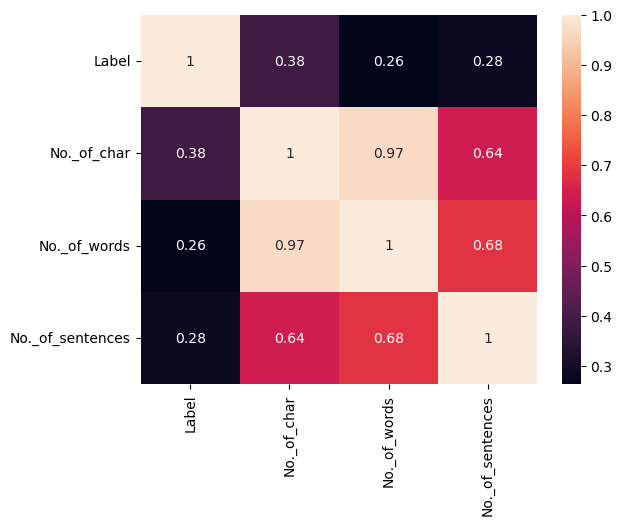

In [31]:
sns.heatmap(data.corr() , annot = True)

In [32]:
ps = PorterStemmer()

In [33]:
def cleaned_sms(sms):
    sms = sms.lower() # lower case
    sms = nltk.word_tokenize(sms)  # word tokenization
    
    y = []
    for i in sms:
        if i.isalnum():
            y.append(i)  # removing special characters
    sms = y[:]
    y.clear()
    
    for i in sms:
        if i not in stopwords.words('english') and i not in string.punctuation:  # removing stopwords
            y.append(i)
    
    sms = y[:]
    y.clear()
    
    for i in sms:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [34]:
data['cleaned_sms'] = data['sms'].apply(cleaned_sms)

In [35]:
data.head()

,Label,sms,No._of_char,No._of_words,No._of_sentences,cleaned_sms
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [36]:
# generating wordcloud of spam sms
from wordcloud import WordCloud
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')

In [37]:
spam_wc = wc.generate(data[data['Label'] == 1]['cleaned_sms'].str.cat(sep = " "))

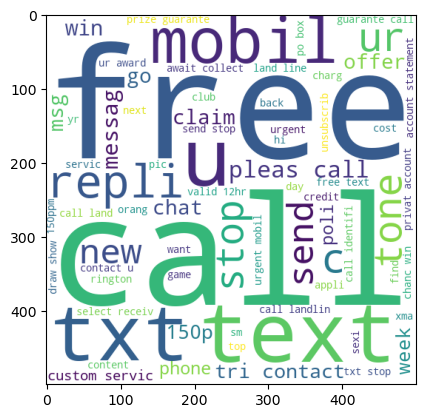

In [38]:
plt.imshow(spam_wc)

In [39]:
ham_wc = wc.generate(data[data['Label'] == 0]['cleaned_sms'].str.cat(sep = " "))

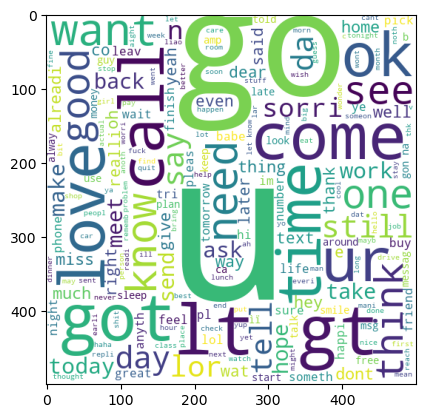

In [40]:
plt.imshow(ham_wc)

C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


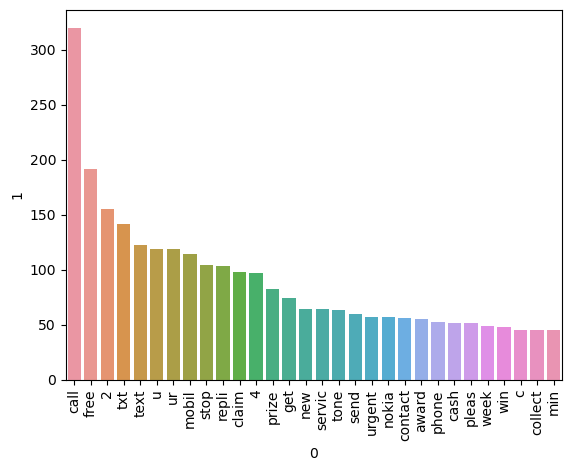

In [41]:
# top 30 spam words
spam_corpus = []
for msg in data[data['Label'] == 1]['cleaned_sms'].tolist():
    for words in msg.split():
        spam_corpus.append(words)
        
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0] , pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


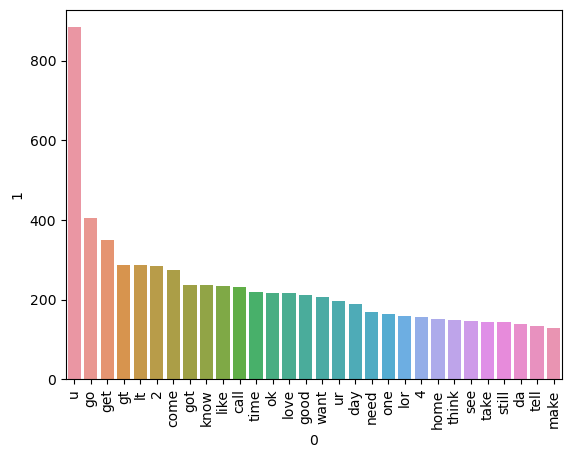

In [42]:
# top 30 ham words
ham_corpus = []
for msg in data[data['Label'] == 0]['cleaned_sms'].tolist():
    for words in msg.split():
        ham_corpus.append(words)

sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0] , pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

# Model Building
### Naive Bayes

In [43]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 3000)

In [44]:
x = tfidf.fit_transform(data['cleaned_sms']).toarray()

In [45]:
y = data['Label'].values

In [46]:
from sklearn.model_selection import train_test_split
x_train , x_test, y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 2)

In [47]:
from sklearn.naive_bayes import GaussianNB , MultinomialNB , BernoulliNB
from sklearn.metrics import accuracy_score , confusion_matrix , precision_score

In [48]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [49]:
gnb.fit(x_train , y_train)
y_pred_gnb = gnb.predict(x_test)
print(accuracy_score(y_test , y_pred_gnb ))
print(confusion_matrix(y_test , y_pred_gnb))
print(precision_score(y_test , y_pred_gnb))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [50]:
mnb.fit(x_train , y_train)
y_pred_mnb = mnb.predict(x_test)
print(accuracy_score(y_test , y_pred_mnb ))
print(confusion_matrix(y_test , y_pred_mnb))
print(precision_score(y_test , y_pred_mnb))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [51]:
bnb.fit(x_train , y_train)
y_pred_bnb = bnb.predict(x_test)
print(accuracy_score(y_test , y_pred_bnb ))
print(confusion_matrix(y_test , y_pred_bnb))
print(precision_score(y_test , y_pred_bnb))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [52]:
x_tfidf = tfidf.fit_transform(data['cleaned_sms']).toarray()
y_tfidf = data['Label'].values


x_train_tfidf , x_test_tfidf, y_train_tfidf , y_test_tfidf = train_test_split(x_tfidf , y_tfidf , test_size = 0.2 ,
                                                                              random_state = 2)
gnb_tfidf = GaussianNB()
mnb_tfidf = MultinomialNB()
bnb_tfidf = BernoulliNB()

In [53]:
gnb_tfidf.fit(x_train_tfidf , y_train_tfidf)
y_pred_gnb_tfidf = gnb_tfidf.predict(x_test_tfidf)
print(accuracy_score(y_test_tfidf , y_pred_gnb_tfidf ))
print(confusion_matrix(y_test_tfidf , y_pred_gnb_tfidf))
print(precision_score(y_test_tfidf , y_pred_gnb_tfidf))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [54]:
mnb_tfidf.fit(x_train_tfidf , y_train_tfidf)
y_pred_mnb_tfidf = mnb_tfidf.predict(x_test_tfidf)
print(accuracy_score(y_test_tfidf , y_pred_mnb_tfidf ))
print(confusion_matrix(y_test_tfidf , y_pred_mnb_tfidf))
print(precision_score(y_test_tfidf , y_pred_mnb_tfidf))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [55]:
bnb_tfidf.fit(x_train_tfidf , y_train_tfidf)
y_pred_bnb_tfidf = bnb_tfidf.predict(x_test_tfidf)
print(accuracy_score(y_test_tfidf , y_pred_bnb_tfidf ))
print(confusion_matrix(y_test_tfidf , y_pred_bnb_tfidf))
print(precision_score(y_test_tfidf , y_pred_bnb_tfidf))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [56]:
# tfidf--mnb

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier , BaggingClassifier 
from sklearn.ensemble import ExtraTreesClassifier , GradientBoostingClassifier
from xgboost import XGBClassifier


In [58]:
lr = LogisticRegression(solver = 'liblinear' , penalty = 'l1')
svc = SVC(kernel = 'sigmoid' , gamma = 1.0)
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth = 5)
knn = KNeighborsClassifier()
rfc = RandomForestClassifier(n_estimators = 50 , random_state = 2)
adc = AdaBoostClassifier(n_estimators = 50 , random_state = 2)
bc = BaggingClassifier(n_estimators = 50 , random_state = 2)
etc = ExtraTreesClassifier(n_estimators = 50 , random_state = 2)
gbc = GradientBoostingClassifier(n_estimators = 50 , random_state = 2)
xgb = XGBClassifier(n_estimators = 50 , random_state = 2)

In [59]:
clfs = {
    'LR' : lr,
    'SVC' : svc,
    'NB' : mnb,
    'DT' : dtc,
    'KNN' : knn,
    'RF' : rfc,
    'ADB' : adc,
    'BC' : bc,
    'ET' : etc,
    'GB' : gbc,
    'XGB' : xgb
    
}

In [60]:
def train_classifier(clf , x_train , y_train , x_test , y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test , y_pred)
    precision = precision_score(y_test , y_pred)
    
    return accuracy , precision

In [61]:
accuracy_scores= []
precision_scores= []

for name , clf in clfs.items():
    current_accuracy , current_precision = train_classifier(clf , x_train , y_train , x_test , y_test)
    
    print("For " , name)
    print("Accuracy - " , current_accuracy)
    print("Precision - " , current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9274661508704062
Precision -  0.8118811881188119


C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


For  KNN
Accuracy -  0.9052224371373307
Precision -  1.0
For  RF
Accuracy -  0.9748549323017408
Precision -  0.9827586206896551
For  ADB
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BC
Accuracy -  0.9574468085106383
Precision -  0.8671875
For  ET
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GB
Accuracy -  0.9477756286266924
Precision -  0.92
For  XGB
Accuracy -  0.971953578336557
Precision -  0.943089430894309


In [62]:
performance_data = pd.DataFrame({'Algorithms' : clfs.keys() , 'Accuracy' : accuracy_scores ,
                                 'Precision' : precision_scores}).sort_values('Precision' , ascending = False)

In [63]:
performance_data

,Algorithms,Accuracy,Precision
2,NB,0.970986,1.000000
4,KNN,0.905222,1.000000
5,RF,0.974855,0.982759
1,SVC,0.975822,0.974790
8,ET,0.974855,0.974576
0,LR,0.958414,0.970297
10,XGB,0.971954,0.943089
6,ADB,0.960348,0.929204
9,GB,0.947776,0.920000
7,BC,0.957447,0.867188


##### 

In [65]:
import pickle
pickle.dump(tfidf , open('vectorizer.pkl' , 'wb'))
pickle.dump(mnb , open('model.pkl' , 'wb'))